<a href="https://colab.research.google.com/github/manjusha0109/Data-Science-Assignments-Excelr/blob/main/eastwestairlines_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data.shape

(3999, 12)

In [ ]:
air=data.drop(['ID#','Award?'], axis=1)
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


####Normalization 

In [ ]:
  def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
df_norm = norm_func(air.iloc[:,:])
df_norm 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


#KMEANS Clustering

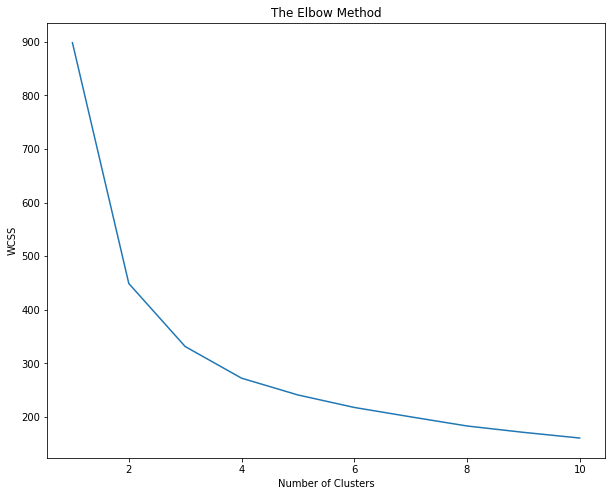

In [ ]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [ ]:
WCSS

[898.2705822007467,
 448.9989194445699,
 331.43269577259844,
 272.39254909046406,
 241.07777351495116,
 217.7632343112532,
 200.24817955029846,
 183.18399965543472,
 171.31594794081036,
 160.69503635089256]

In [ ]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(df_norm)  

In [ ]:
y_kmeans

array([2, 2, 2, ..., 1, 0, 0], dtype=int32)

In [ ]:
clf.cluster_centers_ 

array([[2.36724363e-02, 1.09788344e-02, 2.37926136e-02, 1.10085227e-02,
        1.24289773e-03, 1.69214392e-02, 8.35177722e-02, 1.28437586e-02,
        2.19500429e-02, 2.65314415e-01],
       [5.01832357e-02, 1.09262286e-02, 6.25920471e-01, 7.36377025e-04,
        3.31369661e-03, 1.18174302e-01, 2.09953077e-01, 1.28867533e-02,
        2.18412204e-02, 3.63597299e-01],
       [3.87082781e-02, 1.52707004e-02, 3.21888412e-02, 1.07296137e-02,
        1.50214592e-03, 1.96348371e-02, 9.29234455e-02, 1.58009047e-02,
        2.81156369e-02, 6.93991623e-01],
       [8.05148873e-02, 1.47645960e-02, 7.54016064e-01, 6.69344043e-04,
        8.70147256e-03, 1.78146423e-01, 2.29024626e-01, 1.93540058e-02,
        3.36692683e-02, 7.44146427e-01]])

In [ ]:
clf.inertia_

272.39262630647454

In [ ]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
air['clust']=md # creating a  new column and assigning it to new column 
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air.groupby(air.clust).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,
0,40357.669034,122.392045,1.095170,1.022017,1.004972,4461.929688,7.182528,395.806108,1.163352,2202.517756
1,85554.287187,121.805596,3.503682,1.001473,1.013255,31160.790869,18.055965,397.131075,1.157585,3017.675994
2,65991.343348,170.237768,1.128755,1.021459,1.006009,5177.412017,7.991416,486.936481,1.490129,5757.966524
3,137264.839357,164.595716,4.016064,1.001339,1.034806,46974.539491,19.696118,596.432396,1.784471,6173.950469


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


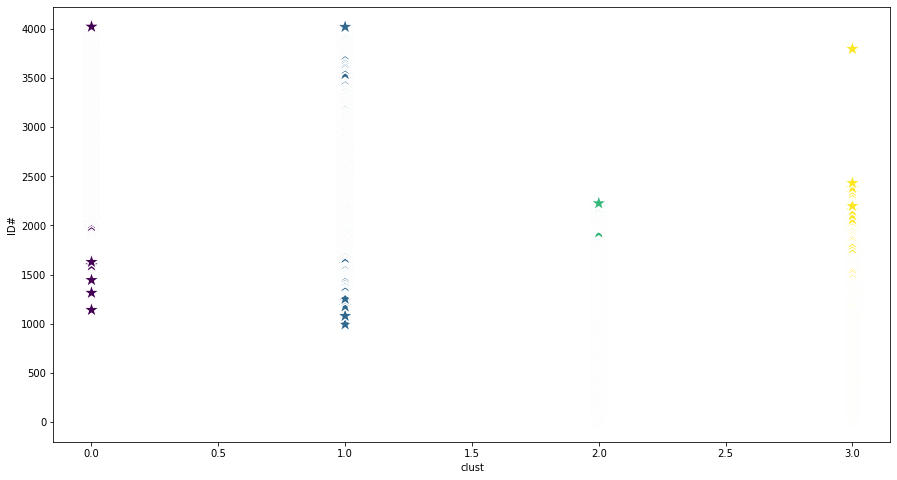

In [ ]:
plt.figure(figsize=(15,8))
sn.scatterplot(air['clust'],data['ID#'],c=clf.labels_,s=300,marker='*')
plt.show();

#DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
array=air.values
array

array([[28143,     0,     1, ...,     0,  7000,     2],
       [19244,     0,     1, ...,     0,  6968,     2],
       [41354,     0,     1, ...,     0,  7034,     2],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00,  6.04380405e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00,  6.04380405e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00,  6.04380405e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00, -2.75138241e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -1.15465689e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -1.15465689e+00]])

In [ ]:
dbscan = DBSCAN(eps=0.70, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.7, min_samples=10)

In [ ]:
dbscan.labels_ 

array([0, 0, 0, ..., 5, 6, 6])

In [ ]:
c=pd.DataFrame(dbscan.labels_,columns=['cluster'])  

In [ ]:
c

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,6
3995,6
3996,5
3997,6


In [ ]:
df = pd.concat([data,c],axis=1)  
df   

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6


In [ ]:
d1=dbscan.labels_
d1

array([0, 0, 0, ..., 5, 6, 6])

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(X, d1)

0.0983201597948486

In [ ]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(X)

In [ ]:
y_kmeans

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [ ]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1

,Kcluster
0,1
1,1
2,1
3,1
4,0
...,...
3994,4
3995,4
3996,4
3997,4


In [ ]:
df1 = pd.concat([df,cl1],axis=1) 
df1 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,Kcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,6,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6,4


silhouette_score

In [ ]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.30342931776823723

DBSCAN Visualization

Text(0, 0.5, 'cluster')

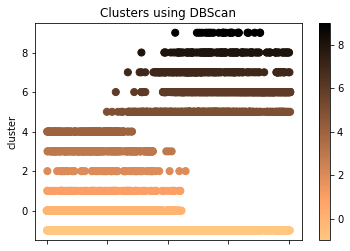

In [ ]:
df.plot(x="ID#",y ="cluster",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')
plt.xlabel("ID#")
plt.ylabel("cluster")

Text(0.5, 1.0, 'Clusters using KMeans')

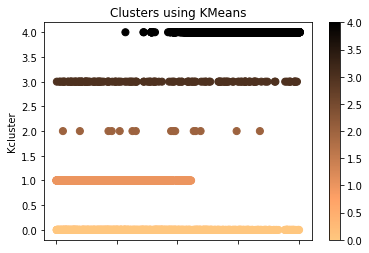

In [ ]:
df1.plot(x="ID#",y ="Kcluster",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


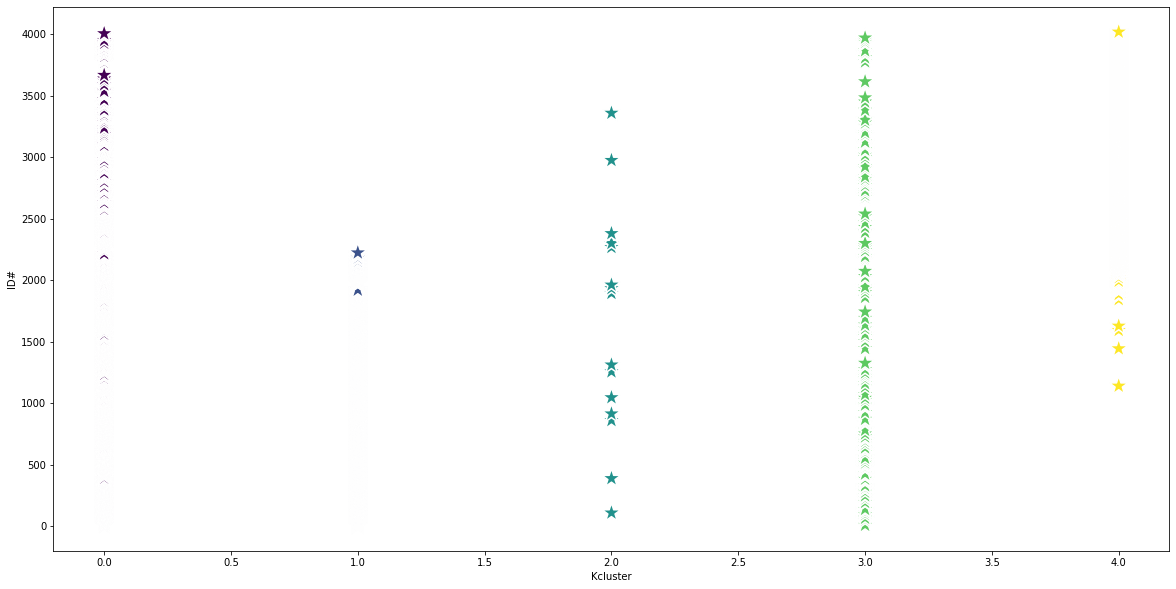

In [ ]:
plt.figure(figsize=(20,10))
sn.scatterplot(df1['Kcluster'],df1['ID#'],c=clf.labels_,s=400,marker='*')
plt.show();

# HIERARCHAICAL Clustering

In [ ]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air=data.drop(['ID#','Award?'],axis=1)

In [ ]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
air_subset = pd.DataFrame(scaler.fit_transform(air.iloc[:,1:7]))
air_subset

,0,1,2,3,4,5
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394
...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065


Dendrogrom

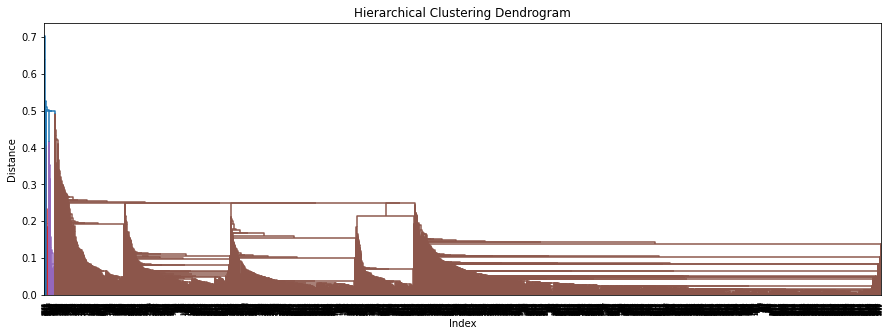

In [ ]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()  

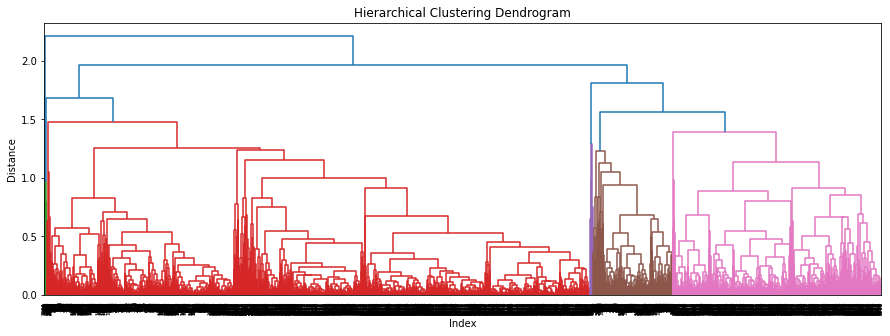

In [ ]:
p = np.array(df_norm) 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
)
plt.show()    

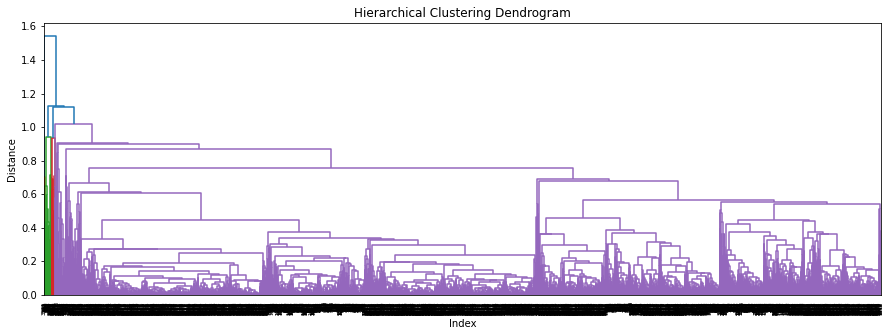

In [ ]:
p = np.array(df_norm) 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    
)
plt.show()    

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
air['clust']=cluster_labels   
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [ ]:
air.iloc[:,1:].groupby(air.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
clust,,,,,,,,,,
0,149.668605,3.667151,1.001453,1.001453,38389.199128,18.653343,477.122093,1.428052,4182.311047,0.0
1,0.000000,3.642857,1.000000,4.142857,97132.785714,28.214286,378.571429,1.071429,4462.142857,1.0
2,137.437211,1.201079,1.021572,1.001156,5388.251541,7.672188,414.703005,1.245763,4074.776579,2.0
3,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,3.0
4,1355.000000,1.222222,1.000000,1.000000,14267.222222,15.555556,2392.666667,9.111111,7318.666667,4.0


In [ ]:
data = air[(air.clust==0)]
data  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
4,97752,0,4,1,1,43300,26,2077,4,6935,0
8,443003,0,3,2,1,1753,43,3850,12,6948,0
11,96522,0,5,1,1,61105,19,0,0,6924,0
15,28495,0,4,1,1,49442,15,0,0,6912,0
16,51890,0,4,1,1,48963,16,0,0,6910,0
...,...,...,...,...,...,...,...,...,...,...,...
3979,57793,0,3,1,1,20959,15,1198,3,1424,0
3980,28867,0,3,1,1,19169,28,0,0,1425,0
3985,59017,0,4,1,1,34746,25,0,0,1418,0
3991,39142,0,3,1,1,14981,28,0,0,1408,0


In [ ]:
data = air[(air.clust==1)]
data  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
384,28193,0,5,1,4,103456,32,0,0,6980,1
850,25629,0,4,1,5,107308,36,600,2,5966,1
904,15835,0,2,1,5,112171,16,0,0,5825,1
1036,154664,0,4,1,3,73881,33,0,0,5769,1
1244,166465,0,4,1,4,98717,30,0,0,5531,1
1300,737514,0,3,1,4,43993,40,2150,7,5030,1
1878,128302,0,5,1,4,132263,32,400,2,4103,1
1917,82981,0,5,1,3,105325,44,1000,2,3964,1
1946,126873,0,4,1,5,95598,32,500,1,3880,1
2251,125679,0,3,1,4,68151,27,650,1,3683,1


In [ ]:
data = air[(air.clust==2)]
data  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
5,16420,0,1,1,1,0,0,0,0,6942,2
...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,2
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [ ]:
data = air[(air.clust==3)]
data  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
2015,53232,888,4,1,1,80696,65,22100,45,3831,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,3
3594,27619,0,4,1,1,83726,68,14050,46,1325,3


In [ ]:
data = air[(air.clust==4)]
data  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
117,969559,0,1,1,1,2500,3,1000,2,7718,4
275,1704838,0,1,1,1,17108,32,4823,23,7283,4
318,766419,0,1,1,1,11398,3,398,1,7162,4
420,529886,7210,1,1,1,23866,26,7741,15,8296,4
471,743745,2066,1,1,1,4100,20,2500,18,8228,4
481,1125076,0,3,1,1,23046,14,0,0,8107,4
488,1199220,2919,1,1,1,3800,19,3300,18,8023,4
1115,739476,0,1,1,1,24215,8,322,1,5678,4
1188,837979,0,1,1,1,18372,15,1450,4,5373,4


#Inference


In Hierarichical clustering, complete method is suitable to form cluster for EastWestairlines.